In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from multi_tester import *

In [2]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [3]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 250, 
    mutation_rate = 0.05,
    max_tree_depth = 10,
)

feature_generator_kargs = {
    "operations" : [add, sub, mul, div, hyp, log],
    "operation_names" : ["+", "-", "*", "/", "hyp", "log"],
    "popsize" : 150,
    "maxiter" : 250,
    "mutation_rate" : 0.05,
    "max_tree_depth" : 10,
}

In [4]:
dataset = load_diabetes()
X = dataset.data
y = dataset.target
X.shape, y.shape

((442, 10), (442,))

In [5]:
tester = tester(X, y, feature_generator_kargs, 5, 1, X.shape[0], verbose = True, test_size = 0.2, random_state = 13)

In [6]:
tester.test_models(nodatatests = 5, notests = 25, show_iterations=5)

Split:  0 Feature:  0
Iteration:  249 Best fitness:  0.38116332819722654 Generation best 0.34172765793528503
Split:  0 Feature:  1
Iteration:  249 Best fitness:  0.381187403697997 Generation best 0.353019067796610254
Split:  0 Feature:  2
Iteration:  249 Best fitness:  0.37122014637904466 Generation best 0.33125481510015413
Split:  0 Feature:  3
Iteration:  249 Best fitness:  0.40745377503852076 Generation best 0.36014541602465333
Split:  0 Feature:  4
Iteration:  249 Best fitness:  0.35559514637904466 Generation best 0.33238636363636365
Iteration 4 - MSE 0.6976875949138888, R2 0.34880356711655525, MAE 0.6850156263094084, NEW_MSE 0.6882557075760009, NEW_R2 0.35760695051417646, NEW_MAE 0.6757828318975785
Iteration 9 - MSE 0.6932669389045052, R2 0.35292964796606596, MAE 0.6756642485384415, NEW_MSE 0.671624222953205, NEW_R2 0.37313017830104467, NEW_MAE 0.6628417923185189
Iteration 14 - MSE 0.7118311127654547, R2 0.3356025177636571, MAE 0.6850329939571215, NEW_MSE 0.671390557240392, NEW_R2

In [9]:
import os

# create forlder insuranse

if not os.path.exists("results/diabetes"):
    os.makedirs("results/diabetes")

for key in tester.individual_tests:
    tester.individual_tests[key].to_csv("results/diabetes/" + key + ".csv")

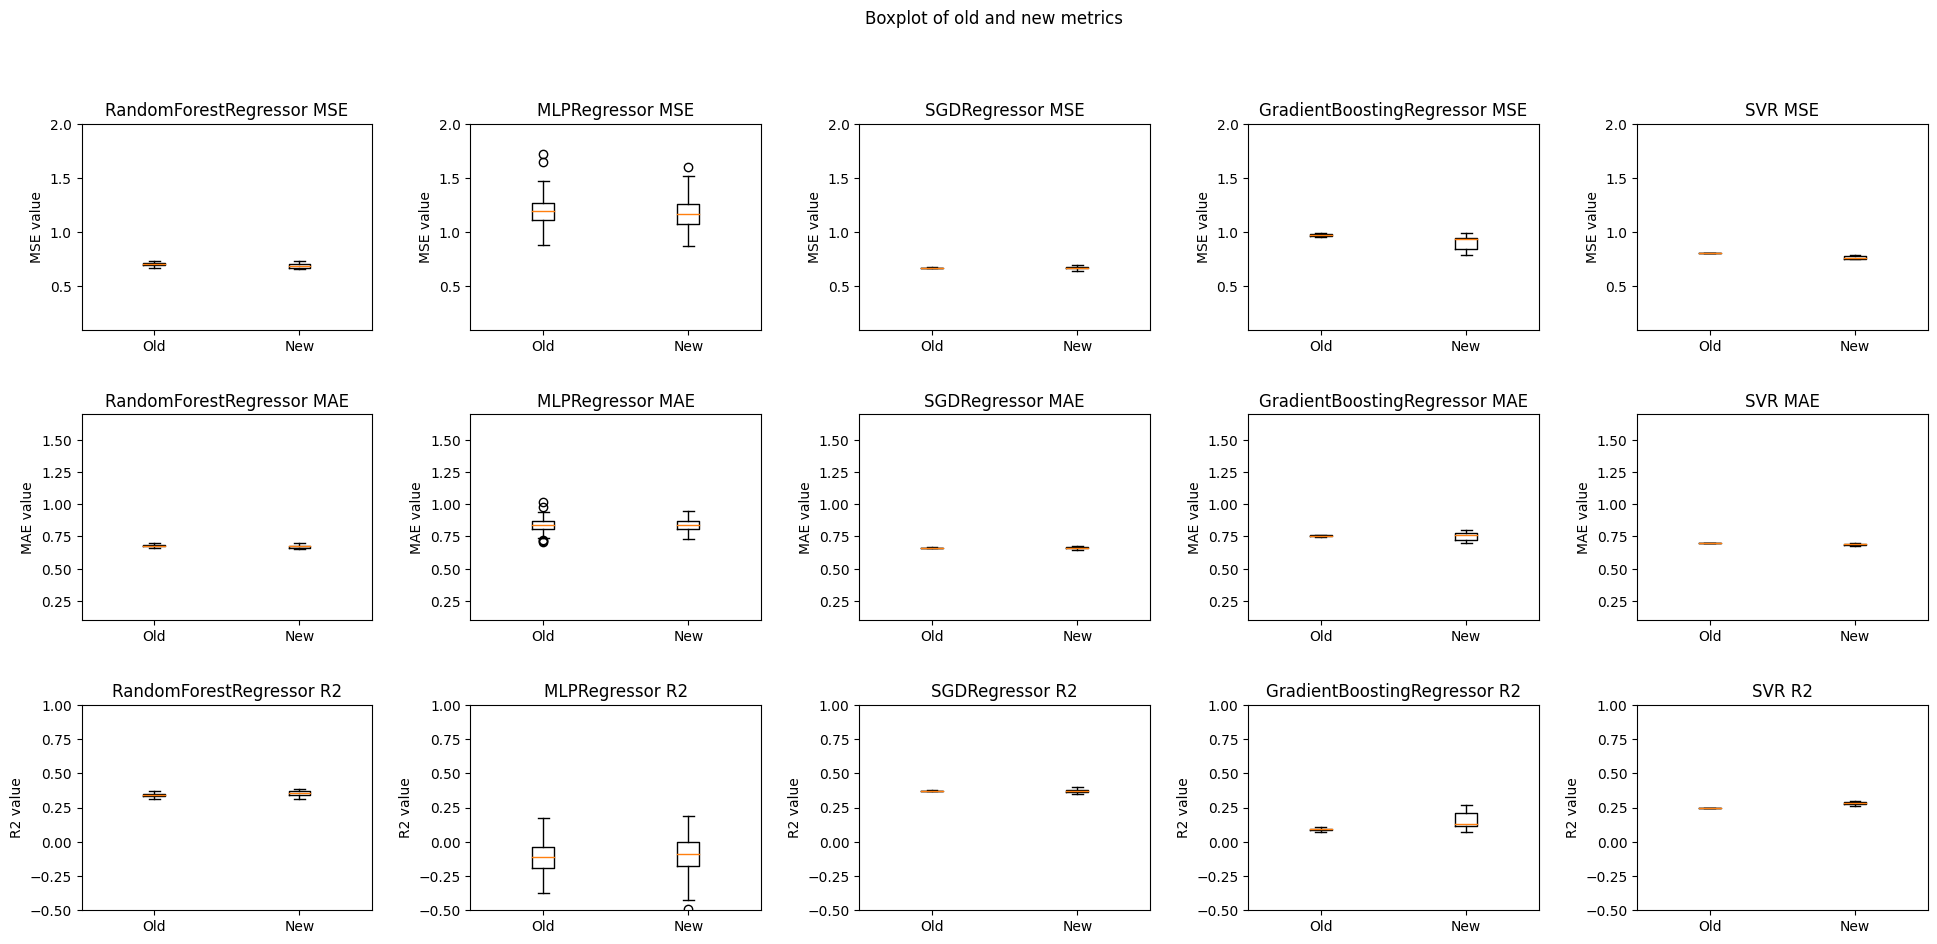

In [7]:
tests = tester.get_individual_tests()
mses = pd.DataFrame(columns = tests.keys())
maes = pd.DataFrame(columns = tests.keys())
r2s = pd.DataFrame(columns = tests.keys())
new_mses = pd.DataFrame(columns = tests.keys())
new_maes = pd.DataFrame(columns = tests.keys())
new_r2s = pd.DataFrame(columns = tests.keys())

for key in tests.keys():
    mses[key] = tests[key]["MSE"]
    maes[key] = tests[key]["MAE"]
    r2s[key] = tests[key]["R2"]
    new_mses[key] = tests[key]["NEW_MSE"]
    new_maes[key] = tests[key]["NEW_MAE"]
    new_r2s[key] = tests[key]["NEW_R2"]

NO_MODELS = len(tests.keys())
model_names = [i for i in tests.keys()]
NO_STATS = 3


fig, axs = plt.subplots(NO_STATS, NO_MODELS, figsize=(20, 10))
fig.suptitle('Boxplot of old and new metrics')

# add padding
fig.tight_layout(pad=4.0)

for i in range(NO_MODELS):
    axs[0, i].boxplot([mses.iloc[:, i], new_mses.iloc[:, i]])
    axs[0, i].set_title(model_names[i] + ' MSE')
    axs[0, i].set_xticklabels(['Old', 'New'])
    axs[0, i].set(ylabel='MSE value')
    # set mse y range between 0 and 62000
    axs[0, i].set_yscale('linear')
    axs[0, i].set_ylim(0.1, 2)

    axs[1, i].boxplot([maes.iloc[:, i], new_maes.iloc[:, i]])
    axs[1, i].set_title(model_names[i] + ' MAE')
    axs[1, i].set_xticklabels(['Old', 'New'])
    axs[1, i].set(ylabel='MAE value')

    # set mae y range between 0 and 80 in log scale
    axs[1, i].set_yscale('linear')
    axs[1, i].set_ylim(0.1, 1.7)


    axs[2, i].boxplot([r2s.iloc[:, i], new_r2s.iloc[:, i]])
    axs[2, i].set_title(model_names[i] + ' R2')
    axs[2, i].set_xticklabels(['Old', 'New'])
    axs[2, i].set(ylabel='R2 value')
    # set r2 y range between -0.3 and 1 and linear scale
    axs[2, i].set_yscale('linear')
    axs[2, i].set_ylim(-0.5, 1)

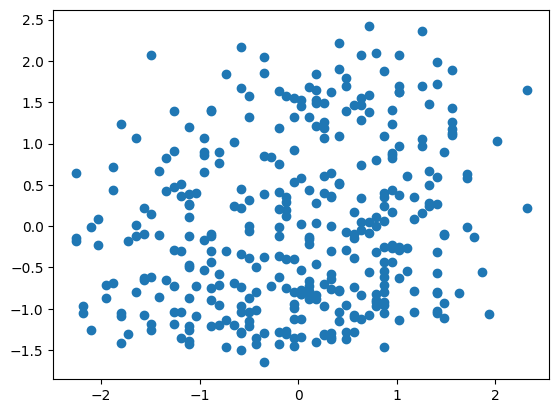

Min:  -2.2552437683941675 Max:  2.322241906219007 Mean:  2.0128689398303122e-17 Std:  1.0


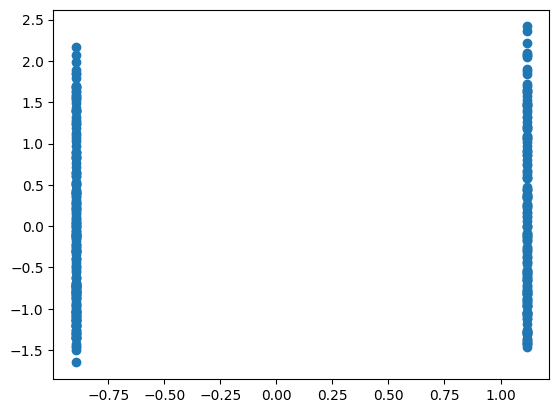

Min:  -0.8949974347244066 Max:  1.117321638254673 Mean:  -1.8367429075951597e-16 Std:  1.0000000000000016


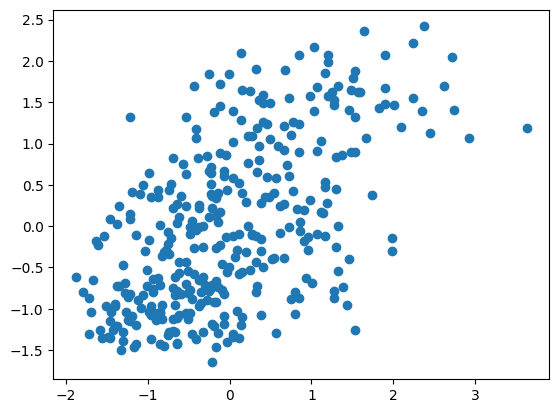

Min:  -1.8769914452485474 Max:  3.6298297163071203 Mean:  4.0257378796606245e-17 Std:  1.0000000000000002


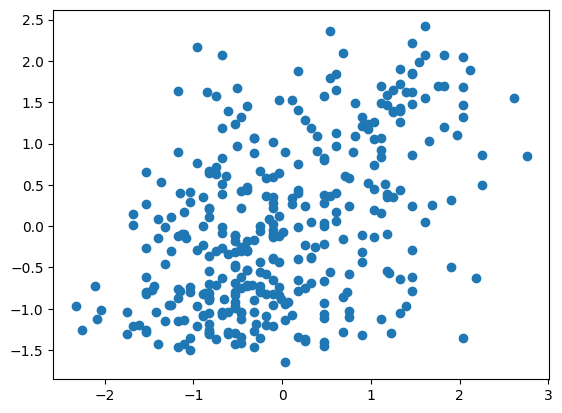

Min:  -2.3230360448310083 Max:  2.756114542546244 Mean:  1.5096517048727343e-17 Std:  1.0


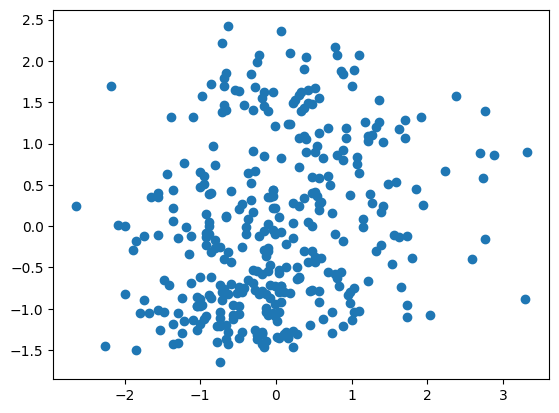

Min:  -2.6423725634578776 Max:  3.313075874454197 Mean:  0.0 Std:  0.9999999999999998


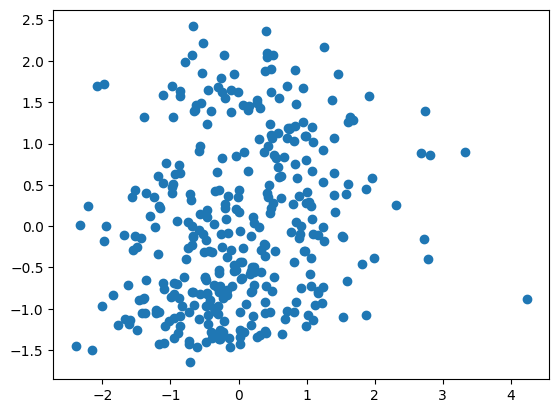

Min:  -2.3882814342804233 Max:  4.2339903356881905 Mean:  7.548258524363671e-18 Std:  0.9999999999999998


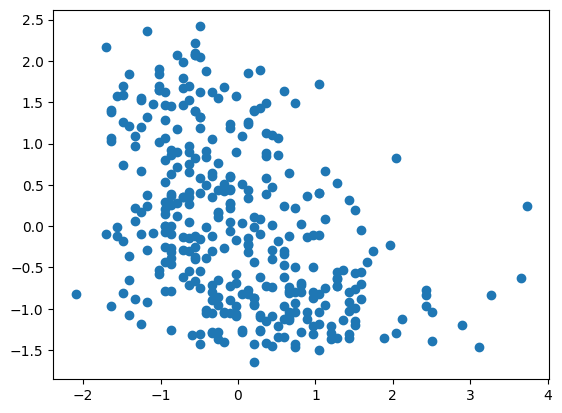

Min:  -2.0931479190557782 Max:  3.7305463897260127 Mean:  -5.0321723495757804e-17 Std:  1.0000000000000004


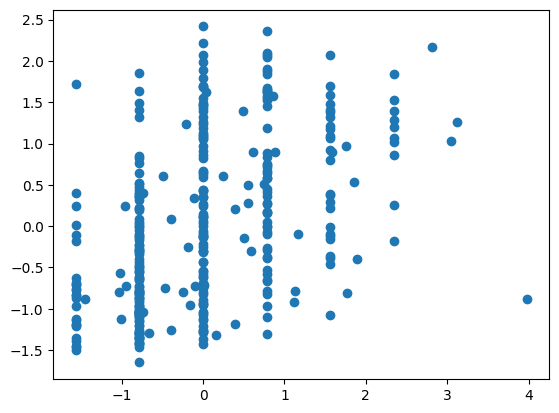

Min:  -1.562710015661834 Max:  3.9788238134321725 Mean:  -7.045041289406092e-17 Std:  1.0000000000000016


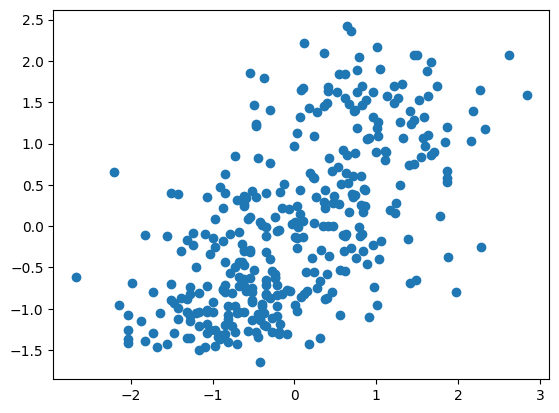

Min:  -2.6714523194463746 Max:  2.8395455601650026 Mean:  1.0064344699151561e-17 Std:  1.0000000000000002


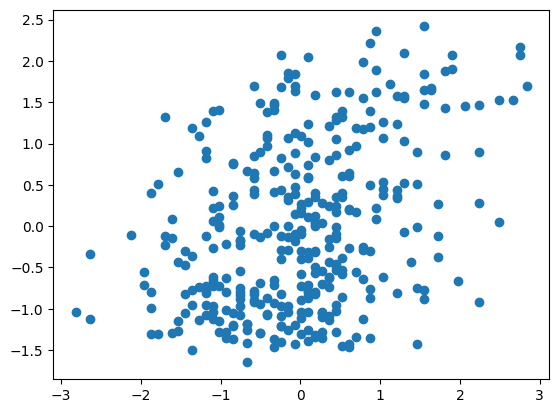

Min:  -2.813426159112278 Max:  2.837194759422019 Mean:  0.0 Std:  1.0


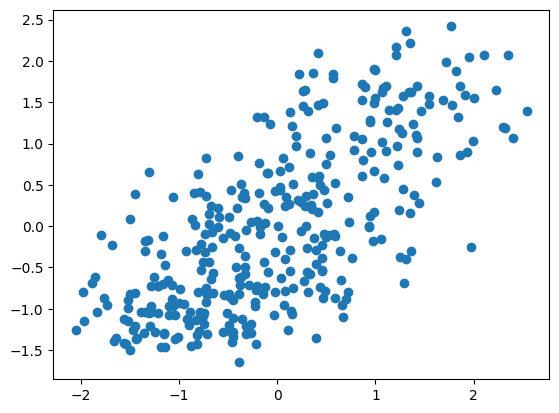

Min:  -2.0518578364468305 Max:  2.5425057120081913 Mean:  3.0193034097454685e-17 Std:  1.0


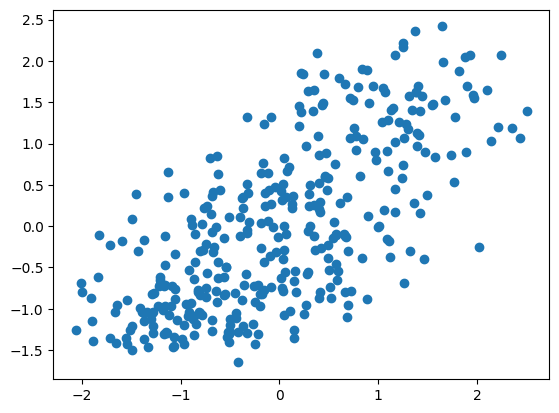

Min:  -2.0593005725160762 Max:  2.5026802640204635 Mean:  -2.5160861747878902e-17 Std:  1.0000000000000002


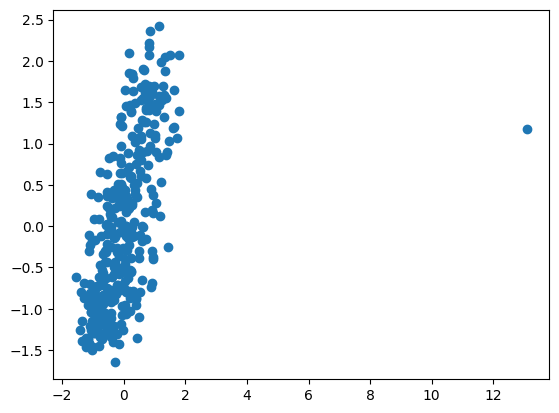

Min:  -1.5556319477441476 Max:  13.090813338550966 Mean:  3.0193034097454685e-17 Std:  1.0000000000000002


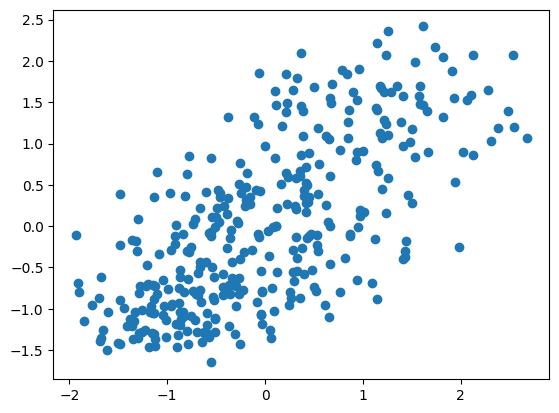

Min:  -1.9335415216612406 Max:  2.6743013876762127 Mean:  1.1573996404024295e-16 Std:  0.9999999999999998


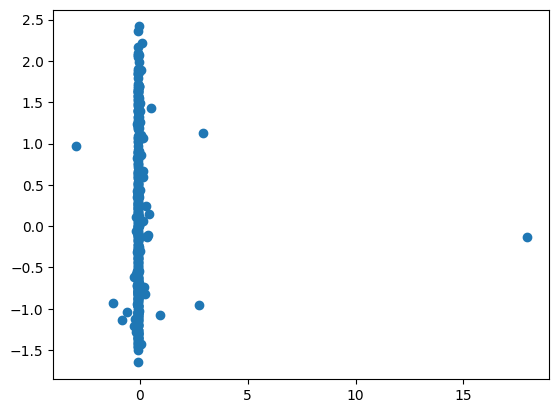

Min:  -2.965609752554876 Max:  17.94117242337313 Mean:  -5.0321723495757806e-18 Std:  0.9999999999999996


In [8]:
for i in range(tester.new_X_train.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_train[:, i], tester.y_train)
    plt.show()
    print("Min: ", tester.new_X_train[:, i].min(), "Max: ", tester.new_X_train[:, i].max(), "Mean: ", tester.new_X_train[:, i].mean(), "Std: ", tester.new_X_train[:, i].std())
    